In [ ]:
batch_size = 32

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-04-12 22:20:10--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-12 22:20:10--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-12 22:20:10--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  19.8M      0  0:00:04  0:00:04 --:--:-- 19.8M


In [ ]:
!cat aclImdb/train/pos/0_9.txt

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!

In [ ]:
!rm -r aclImdb/train/unsup

In [ ]:
import tensorflow as tf

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    "aclImdb/train",
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=1337,
)
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    "aclImdb/train",
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=1337,
)
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    "aclImdb/test", batch_size=batch_size
)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [ ]:
print(f"Number of batches in raw_train_ds: {raw_train_ds.cardinality()}")
print(f"Number of batches in raw_val_ds: {raw_val_ds.cardinality()}")
print(f"Number of batches in raw_test_ds: {raw_test_ds.cardinality()}")

Number of batches in raw_train_ds: 625
Number of batches in raw_val_ds: 157
Number of batches in raw_test_ds: 782


In [ ]:
raw_train_ds.cardinality().numpy()
# len(list(raw_train_ds))

625

In [ ]:
txt1 = ''
lbl1 = ''
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(1):
        txt1 = text_batch.numpy()[i]
        lbl1 = label_batch.numpy()[i]

print(txt1)
print(lbl1)

b'I\'ve seen tons of science fiction from the 70s; some horrendously bad, and others thought provoking and truly frightening. Soylent Green fits into the latter category. Yes, at times it\'s a little campy, and yes, the furniture is good for a giggle or two, but some of the film seems awfully prescient. Here we have a film, 9 years before Blade Runner, that dares to imagine the future as somthing dark, scary, and nihilistic. Both Charlton Heston and Edward G. Robinson fare far better in this than The Ten Commandments, and Robinson\'s assisted-suicide scene is creepily prescient of Kevorkian and his ilk. Some of the attitudes are dated (can you imagine a filmmaker getting away with the "women as furniture" concept in our oh-so-politically-correct-90s?), but it\'s rare to find a film from the Me Decade that actually can make you think. This is one I\'d love to see on the big screen, because even in a widescreen presentation, I don\'t think the overall scope of this film would receive its

In [ ]:
import re
import string
def basic_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, "<br />", " ")
    return tf.strings.regex_replace(
        stripped_html, f"[{re.escape(string.punctuation)}]", ""
    )

x = basic_standardization(txt1)

print(string.punctuation)
print(re.escape(string.punctuation))
print(txt1)
print(x.numpy())
       

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
b'I\'ve seen tons of science fiction from the 70s; some horrendously bad, and others thought provoking and truly frightening. Soylent Green fits into the latter category. Yes, at times it\'s a little campy, and yes, the furniture is good for a giggle or two, but some of the film seems awfully prescient. Here we have a film, 9 years before Blade Runner, that dares to imagine the future as somthing dark, scary, and nihilistic. Both Charlton Heston and Edward G. Robinson fare far better in this than The Ten Commandments, and Robinson\'s assisted-suicide scene is creepily prescient of Kevorkian and his ilk. Some of the attitudes are dated (can you imagine a filmmaker getting away with the "women as furniture" concept in our oh-so-politically-correct-90s?), but it\'s rare to find a film from the Me Decade that actually can make you think. This is one I\'d love to see on the big screen, because even in a wide

In [ ]:
from tensorflow.keras.layers import TextVectorization

max_features = 20000
embedding_dim = 128
sequence_length = 500

vectorize_layer = TextVectorization(
    standardize=basic_standardization,
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
)



In [ ]:
text_ds = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)


In [ ]:
path_to_glove_file =  "./glove.6B.100d.txt"

In [ ]:
vocabulary =vectorize_layer.get_vocabulary()
print(len(vocabulary))
print(vocabulary[0:10])


20000
['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it']


In [ ]:
voc_test = vectorize_layer(["the cat is on the table"])
print(voc_test.numpy()[0, :10])
print(voc_test.numpy().shape)

[   2 1127    7   20    2 2972    0    0    0    0]
(1, 500)


In [ ]:
import pathlib
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
word_index = dict(zip(vocabulary, range(len(vocabulary))))

In [158]:
embeddings_index.get('hello')

array([ 0.26688  ,  0.39632  ,  0.6169   , -0.77451  , -0.1039   ,
        0.26697  ,  0.2788   ,  0.30992  ,  0.0054685, -0.085256 ,
        0.73602  , -0.098432 ,  0.5479   , -0.030305 ,  0.33479  ,
        0.14094  , -0.0070003,  0.32569  ,  0.22902  ,  0.46557  ,
       -0.19531  ,  0.37491  , -0.7139   , -0.51775  ,  0.77039  ,
        1.0881   , -0.66011  , -0.16234  ,  0.9119   ,  0.21046  ,
        0.047494 ,  1.0019   ,  1.1133   ,  0.70094  , -0.08696  ,
        0.47571  ,  0.1636   , -0.44469  ,  0.4469   , -0.93817  ,
        0.013101 ,  0.085964 , -0.67456  ,  0.49662  , -0.037827 ,
       -0.11038  , -0.28612  ,  0.074606 , -0.31527  , -0.093774 ,
       -0.57069  ,  0.66865  ,  0.45307  , -0.34154  , -0.7166   ,
       -0.75273  ,  0.075212 ,  0.57903  , -0.1191   , -0.11379  ,
       -0.10026  ,  0.71341  , -1.1574   , -0.74026  ,  0.40452  ,
        0.18023  ,  0.21449  ,  0.37638  ,  0.11239  , -0.53639  ,
       -0.025092 ,  0.31886  , -0.25013  , -0.63283  , -0.0118

In [ ]:
import pandas as pd

df = pd.DataFrame(vocabulary)

df = df.rename(columns={0:"word"})

df.sample(5)


,word
4088,adorable
3519,samurai
12059,rockwell
7002,contributed
13178,harper


In [ ]:
rnd_word = df.sample(1).word
print(word_index[rnd_word.iloc[0]]==rnd_word.index[0])
display(rnd_word)

True


784    somehow
Name: word, dtype: object

In [ ]:
tmp = df.sample(5)

tmp['vectorized'] = tmp['word'].apply(lambda w: vectorize_layer([w]).numpy()[0,:5])
tmp['word to vec'] = tmp['word'].apply(lambda w:embeddings_index[w][:5])
tmp.head()

,word,vectorized,word to vec
7948,je,"[7948, 0, 0, 0, 0]","[-0.28514, -0.55368, 0.46489, 0.52158, -0.17299]"
6250,stroke,"[6250, 0, 0, 0, 0]","[-0.54625, -0.09081, 0.054067, 0.44759, -0.3746]"
6195,glued,"[6195, 0, 0, 0, 0]","[-0.76447, -0.089345, -0.0027581, -0.29247, 0.14992]"
4020,thick,"[4020, 0, 0, 0, 0]","[-1.213, 0.37629, 0.037394, -0.07846, -0.29342]"
426,problem,"[426, 0, 0, 0, 0]","[-0.29581, 0.30855, 0.82131, 0.0085845, -0.66401]"


In [152]:
num_tokens = len(vocabulary) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 19349 words (651 misses)


In [ ]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [ ]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)


In [ ]:
train_ds = train_ds.cache().prefetch(buffer_size=10)
val_ds = val_ds.cache().prefetch(buffer_size=10)
test_ds = test_ds.cache().prefetch(buffer_size=10)

In [ ]:
x,y = tuple(train_ds)[0]


In [ ]:
print(x[0].numpy())
print(y[0].numpy())

[   10     7   240   157     1 15001 13365    19    11   235    21   241
   133    26    43    10  2924     6   119   511     1     3     1  5617
     6     2  1398     1   304    18    11   161    46     5   143   135
    63  2206   704   158     9     7     4   318   402   265   291    32
 13365   115    26   262     2    62     5    33   701  2476   250    32
   975   721     8     2   789    19   444  2079     1    48   155    10
    17   269     7    12     9    80  3167     2   527     5    78    12
    10  2476     1    16    40     7   345    16   136    14    39     1
    39  6017    19   377  4148   992    78     3   379  2394     8     2
   701     1     8    39  3807  7222     9     7   157    49   232    36
  2079     1    54     7  1274     6    27  1905    15    10   207    54
   120 14815   533    18  3103     8    93    54     7 10683     1     3
   326   299     8    10    19    18    91   701 10641    24    21   405
     6 19997     2    78    34  1111   201  6908 15

In [208]:
import tensorflow as tf
from tensorflow.keras import layers

def basic_model():
  inputs = tf.keras.Input(shape=(None,), dtype="int64")
  x = layers.Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer = tf.keras.initializers.Constant(embedding_matrix),
        trainable=False
      )(inputs)
  # x = layers.Embedding(max_features, embedding_dim)(inputs)
  x = layers.Dropout(0.25)(x)

  x = layers.Conv1D(128, 7, padding="same", activation="relu", strides=3)(x)
  x = layers.Conv1D(128, 7, padding="same", activation="relu", strides=3)(x)
  x = layers.GlobalMaxPooling1D()(x)

  x = layers.Dense(128, activation="relu")(x)
  x = layers.Dropout(0.5)(x)
  output = layers.Dense(2, activation = "softmax")(x)
  # output = layers.Dense(1, activation="sigmoid", name="output")(x)
  model = tf.keras.Model(inputs, output)
  return model



In [264]:
import tensorflow as tf
def bidirectional_model():
  inputs = tf.keras.Input(shape=(None,), dtype="int64")
  x = layers.Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer = tf.keras.initializers.Constant(embedding_matrix),
        trainable=False
      )(inputs)
      
  # x = layers.Embedding(max_features, embedding_dim)(inputs)
  # x = layers.Dropout(0.25)(x)

  # Add 2 bidirectional LSTMs
  x = layers.Bidirectional(layers.LSTM(128, dropout=0.2, return_sequences=True))(x)
  x = layers.Bidirectional(layers.LSTM(128, dropout=0.2))(x)
  # Add a classifier
  # output = layers.Dense(1, activation="sigmoid", name="output")(x)
  output = layers.Dense(2, activation = "softmax")(x)
  model = tf.keras.Model(inputs, output)
  return model

In [324]:
import tensorflow as tf
def recurrent_model():
  inputs = tf.keras.Input(shape=(None,), dtype="int64")
  x = layers.Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer = tf.keras.initializers.Constant(embedding_matrix),
        trainable=False
      )(inputs)
      
  x = layers.LSTM(64, dropout=0.1)(x)

  output = layers.Dense(2, activation = "softmax")(x)
  model = tf.keras.Model(inputs, output)
  return model

In [342]:
m_type = 2

In [343]:
if m_type == 0:
  model = basic_model()
if m_type == 1:
  model = bidirectional_model()
if m_type == 2:
  model = recurrent_model()
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [326]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_9 (Embedding)     (None, None, 100)         2000200   
                                                                 
 lstm_6 (LSTM)               (None, 64)                42240     
                                                                 
 dense_10 (Dense)            (None, 2)                 130       
                                                                 
Total params: 2,042,570
Trainable params: 42,370
Non-trainable params: 2,000,200
_________________________________________________________________


In [344]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

checkPoint=ModelCheckpoint("model.h5", save_weights_only=False, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
earlyStopping=EarlyStopping(monitor='val_loss', min_delta = 0.01, patience=10, verbose=0, mode='min') 
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=2.5e-5)


In [345]:
history = model.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=50, 
    batch_size=128,
    callbacks = [lrr,checkPoint,earlyStopping],
    verbose=2)


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.50980, saving model to model.h5
625/625 - 16s - loss: 0.6928 - accuracy: 0.5117 - val_loss: 0.6908 - val_accuracy: 0.5098 - lr: 0.0010 - 16s/epoch - 26ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.50980 to 0.51940, saving model to model.h5
625/625 - 14s - loss: 0.6877 - accuracy: 0.5215 - val_loss: 0.6892 - val_accuracy: 0.5194 - lr: 0.0010 - 14s/epoch - 22ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.51940 to 0.71780, saving model to model.h5
625/625 - 14s - loss: 0.6653 - accuracy: 0.5774 - val_loss: 0.5962 - val_accuracy: 0.7178 - lr: 0.0010 - 14s/epoch - 23ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.71780
625/625 - 13s - loss: 0.6133 - accuracy: 0.6844 - val_loss: 0.6059 - val_accuracy: 0.6946 - lr: 0.0010 - 13s/epoch - 21ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.71780 to 0.72140, saving model to model.h5
625/625 - 14s - loss: 0.6050 - accuracy: 0.6948 - val_loss: 

In [346]:
model =  K.models.load_model('model.h5')

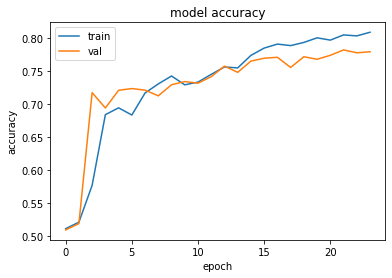

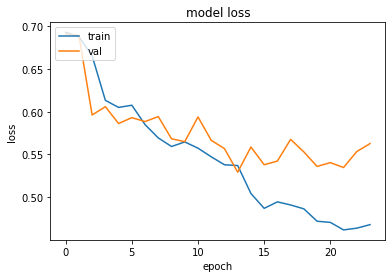

last model accuracy 0.7797999978065491
best model accuracy 0.7825999855995178


In [347]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

index = np.argmax(history.history['val_accuracy'])

print('last model accuracy',history.history['val_accuracy'][-1])
print('best model accuracy',history.history['val_accuracy'][index])

In [348]:
model.evaluate(test_ds)

782/782 [==============================] - 9s 10ms/step - loss: 0.5138 - accuracy: 0.7951


[0.5138289928436279, 0.7950800061225891]

In [349]:
X_test = []
y_test = []
for inputs, outputs in raw_test_ds.as_numpy_iterator():
  for i in range(len(inputs)):
    X_test.append(inputs[i])
    y_test.append(outputs[i])

print(len(X_test))
X_test = np.asarray(X_test)
print(X_test.shape)

y_test = np.asarray(y_test)
print(len(y_test))


25000
(25000,)
25000


In [350]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import seaborn as sns
import tensorflow.keras as K


pred = model.predict(test_ds)



In [351]:
pred[:20]

array([[5.2274907e-01, 4.7725093e-01],
       [1.6407502e-01, 8.3592492e-01],
       [7.9378754e-01, 2.0621246e-01],
       [7.9378754e-01, 2.0621246e-01],
       [7.9378754e-01, 2.0621242e-01],
       [7.9378718e-01, 2.0621277e-01],
       [5.2274907e-01, 4.7725093e-01],
       [1.6407531e-01, 8.3592469e-01],
       [7.9378754e-01, 2.0621245e-01],
       [5.2274907e-01, 4.7725093e-01],
       [1.6407529e-01, 8.3592469e-01],
       [7.9378754e-01, 2.0621242e-01],
       [1.6407531e-01, 8.3592469e-01],
       [7.9378754e-01, 2.0621245e-01],
       [9.9946815e-01, 5.3190673e-04],
       [7.9378754e-01, 2.0621245e-01],
       [7.9378754e-01, 2.0621245e-01],
       [1.6407531e-01, 8.3592469e-01],
       [1.6407529e-01, 8.3592469e-01],
       [1.3541420e-01, 8.6458576e-01]], dtype=float32)

In [352]:
predictions = np.argmax(pred,axis=1)
labels= ['neg','pos']

print(len(predictions))
print(predictions[:5])
print(y_test[:5])

25000
[0 1 0 0 0]
[1 1 1 1 1]


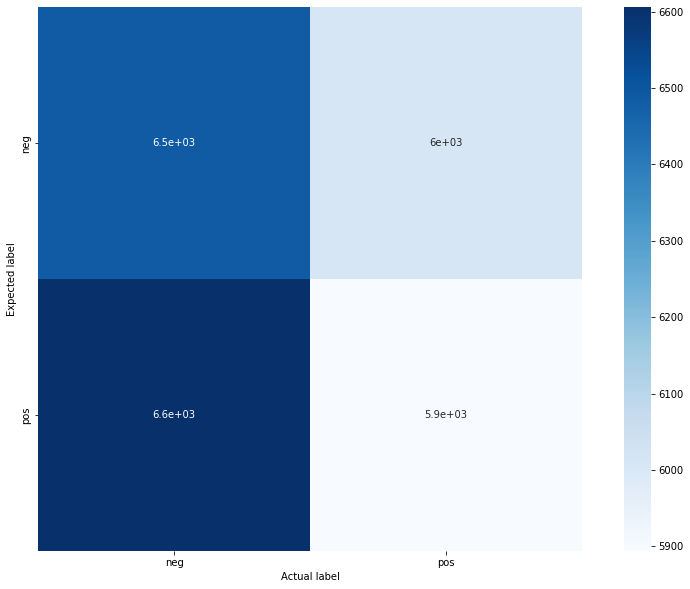

              precision    recall  f1-score   support

         neg       0.50      0.52      0.51     12500
         pos       0.50      0.47      0.48     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.49     25000
weighted avg       0.50      0.50      0.49     25000



txt  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            b"BONJOUR, MONSIEUR SHLOMI is simply a wonderful film! Writer/Director Shemi Zarhin has created a story unlike any other and cast it with such consistently fine actors that it remains a puzzle to me that this film has not become an audience favorite throughout the world. It is intelligent, emotional, edifying, and warm, entertaining, and in all categories it is a winner.Shlomi (Oshri Cohen, in a brilliantly understated performance) is a 16-year-old lad who takes care of his highly dysfunctional family: his mother (Esti Zakheim) is about as distasteful a shrew as ever concocted and in a constant state of ill temper because of her husband cheated on her, and because she is stuck working double shifts to support her ailing father-in-law (Ariek Elias, who as Shlomi's grandfather is a bright, funny, wise, loving old man who deeply cares for Shlomi); a married sister Ziva (Rotem Abuhab)who periodically moves back in to the house because of constant spats with her husband who doesn't help her care for their infant twin sons; his brother Sasi (Assi Cohen) whose life is loud electric guitars, braggadocio about female conquests, and the favorite son of his mother. Stir this mixture and the result is the penultimate dysfunctional family unit. Shlomi cooks gourmet meals for them, shops, cleans house, runs errands, bathes and cares for this grandfather and in general leads a life of submission to a family that views him as a 'retard'.Shlomi longs for a girlfriend and practically fails his school because of his lack of time devoted to caring for his family and a lack of concentration. Serendipitously his math teacher Begin (Nisso Keavia) notes his natural mathematic genius on a discarded test, and with the aid of the headmaster (Yigal Nair) the two encourage him to be tested and discover that he is a genius (?with dyslexia?) and arrange for him to try for a special school in Haifa. Shlomi's mother will hear none of it but between fights with Shlomi's absentee father (Albert Iluz) and confrontations with the teacher and headmaster they finally consent to his testing for the school.Meanwhile Shlomi discovers a girl his age Rona (Aya Koren) who has moved in next door and gradually the two become intertwined in a physical and intellectual relatio

txt  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            b"BONJOUR, MONSIEUR SHLOMI is simply a wonderful film! Writer/Director Shemi Zarhin has created a story unlike any other and cast it with such consistently fine actors that it remains a puzzle to me that this film has not become an audience favorite throughout the world. It is intelligent, emotional, edifying, and warm, entertaining, and in all categories it is a winner.Shlomi (Oshri Cohen, in a brilliantly understated performance) is a 16-year-old lad who takes care of his highly dysfunctional family: his mother (Esti Zakheim) is about as distasteful a shrew as ever concocted and in a constant state of ill temper because of her husband cheated on her, and because she is stuck working double shifts to support her ailing father-in-law (Ariek Elias, who as Shlomi's grandfather is a bright, funny, wise, loving old man who deeply cares for Shlomi); a married sister Ziva (Rotem Abuhab)who periodically moves back in to the house because of constant spats with her husband who doesn't help her care for their infant twin sons; his brother Sasi (Assi Cohen) whose life is loud electric guitars, braggadocio about female conquests, and the favorite son of his mother. Stir this mixture and the result is the penultimate dysfunctional family unit. Shlomi cooks gourmet meals for them, shops, cleans house, runs errands, bathes and cares for this grandfather and in general leads a life of submission to a family that views him as a 'retard'.Shlomi longs for a girlfriend and practically fails his school because of his lack of time devoted to caring for his family and a lack of concentration. Serendipitously his math teacher Begin (Nisso Keavia) notes his natural mathematic genius on a discarded test, and with the aid of the headmaster (Yigal Nair) the two encourage him to be tested and discover that he is a genius (?with dyslexia?) and arrange for him to try for a special school in Haifa. Shlomi's mother will hear none of it but between fights with Shlomi's absentee father (Albert Iluz) and confrontations with the teacher and headmaster they finally consent to his testing for the school.Meanwhile Shlomi discovers a girl his age Rona (Aya Koren) who has moved in next door and gradually the two become intertwined in a physical and intellectual relatio

n° of failing predictions: 12619
accuracy: 0.49524


In [353]:
pd.set_option('display.max_colwidth', None)
df = pd.DataFrame({
          'txt':X_test,
          'predictions':predictions,
          'actual_values':y_test
          })

df['predictions']=df['predictions'].apply(lambda x: labels[int(x)] )
df['actual_values']=df['actual_values'].apply(lambda x: labels[x] ) 

# df['actual_values']=df['actual_values'].apply(lambda x:int(x) ) 


expected = df['predictions'].to_numpy()
actual = df['actual_values'].to_numpy()

# # print(expected[:10])
# # print(actual[:10])

cm=confusion_matrix(actual,expected)

plt.figure(figsize=[15, 10])
sns.heatmap(data=cm, annot=True, cmap='Blues', square=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Actual label')
plt.ylabel('Expected label')
plt.show()

print( classification_report(actual,expected))

display(df.head())

failings = df[df['predictions']!=df['actual_values']]
corrects = df[df['predictions']==df['actual_values']]

display(failings.head())


failing_predictions = len(failings)

print('n° of failing predictions:',failing_predictions)
# print(failings.index[0])
total_data = len(df)

print('accuracy:',1 - failing_predictions / total_data)
# print('accuracy:',model.evaluate(X_test, y_test, batch_size=256))




In [354]:
inputs = tf.keras.Input(shape=(1,), dtype="string")
# Turn strings into vocab indices
indices = vectorize_layer(inputs)
# Turn vocab indices into predictions
outputs = model(indices)

# Our end to end model
end_to_end_model = tf.keras.Model(inputs, outputs)
end_to_end_model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
    # loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
end_to_end_model.evaluate(raw_test_ds)

782/782 [==============================] - 15s 18ms/step - loss: 0.5138 - accuracy: 0.7951


[0.5138289332389832, 0.7950800061225891]

In [355]:
x1 = 'this movie is very good, I liked a lot, it is a masterpiece'
x2 = 'it was unwatchable'
x3 = "This is the worst movie of ALL TIME! It's one of those that is so ridiculous and the acting so bad that you turn off the video 1/3 into it so that you can use your time for better purposes like cleaning the toilet. If you actually watch the whole thing, GOD help you"
# pred_raw = end_to_end_model.predict([x1,x2,x3])

batches = len(raw_test_ds) // batch_size
print(batches)

txt_test = []
pred_test = []
actual_test = []

for j in range(len(raw_test_ds)):
  # print('batch n: ',j+1)
  tmp = raw_test_ds.take(1)
  pred_raw = end_to_end_model.predict(tmp)
  for text_batch, label_batch in tmp:
      for i in range(len(pred_raw)):
          txt1 = text_batch.numpy()[i]
          lbl1 = label_batch.numpy()[i]
          
          txt_test.append(txt1)
          actual_test.append(labels[lbl1])
          pred_test.append(labels[np.argmax(pred_raw[i])])

          # print(txt1)
          # print(labels[lbl1],labels[np.argmax(pred_raw[i])])





24


In [356]:
txt_test = np.asarray(txt_test)
actual_test = np.asarray(actual_test)
pred_test = np.asarray(pred_test)

In [357]:
df = pd.DataFrame({'text':txt_test,'actual':actual_test,'predicted':pred_test})
df.head()

,text,actual,predicted
0,"b'I saw and have the original 1959 black and white that stars Shelley Winters and Millie Perkins and no matter how many times I watch it, I can\'t help but not to cry.<br /><br />This version was (obviously) a set, like the 1959 was, but there were so many mistakes in layout. Spiral staircase? Items that did not exist in that time period existed in the film. Doris Roberts, sad to say CANNOT play drama, she a comedic actress and that will not change. James Coco was a horrible Mr. Van Daan and Mr. Dussel resembled a college professor of mine rather then the dentist he was supposed to play. In the original film, Anne walked the ""gauntlet"" to go to Peter\'s room, that seemed to take her more then a minute. In this crappy remake, it took her under 10 seconds. The first reviewer was correct... This remake is just that, a remake. What was the director thinking casting comedic actors in a drama role like that. I\'m sorry but James Coco cannot play drama. Max.. Schell was better in Deep Impact then this movie. The cranky Mrs. Frank was just that cranky, I couldn\'t stand her. Referencing and comparing to the 1959 version, I like her better, she did a better job of being the overwhelming mother. Out of 10 stars, I give this remake 3. Don\'t waste your time, get the 1959 version and a box of Kleenex.'",neg,neg
1,"b""This is a well-crafted piece from everyone's favorite master of suspense. As usual, the technical elements such as camera work and lighting are outstanding (especially for the film's time). I did not find the first part of the film very exciting, but the latter one certainly made up for it with one thrilling scene after another.<br /><br />The only thing I did not like about this movie was the choice of Farley Granger for the part of Guy Haines. Somehow, I didn't find him very believable. On the other hand, Robert Walker shines as sinister 'bad guy' Bruno Anthony.<br /><br />Overall, I would highly recommend this.""",pos,neg
2,"b'an excellent, thoughtfully produced historical drama--well played, artfully written, shot in ways that convey accurate visual images of the congo, and with more than a few moving moments, especially for those who care about the history of Africa and imperialism. however, a fair amount of worthwhile content gets lost in translation, and because names, acronyms, and so forth are hard to follow. so i would strongly recommend checking a neutral source such as wikipedia to get a basic sense of the story being depicted (and the subsequent history) before enjoying the film. if you have the DVD version, there is also some useful historical background. there is a point towards the end of the film where the name of a character who then speaks with an American accent is actually beeped out--a simple google search of ""lumumba film censor"" or something similar will reveal a truly fascinating (and perhaps disturbing) twist regarding the production of this important film. this film, if coupled with a little outside research, helps contextualize dozens of other films relating to central/east Africa and/or imperialism, e.g. hotel rwanda, shake hands with the devil, various adaptations of conrad\'s heart of darkness, and even ""ali"" when mohammed ali visits kinshasa.'",pos,neg
3,"b'Even as a big fan of the low to no budget horror genre, I couldnt find this disaster mildly amusing. With horrible acting, a painfully generic ""plot"" and no dimensional characters, no matter how bored and drunk you are, this one is not worth your 81 minutes. Don\'t make the same mistake I did. Rent something else. ANYTHING else!!!'",neg,neg
4,"b'How pointless, hideous characters and boring film. Saved by brief sex scenes, mad witch, gorgeous desert island and Brooks body. The plot is tenuous, the characters are shallow and unlikeable. Having said that I did manage to watch it all, mainly because I was totally transfixed by the jiggling and kind of hoping that her character would come good in the end. The fil

In [358]:
expected = df['predicted'].to_numpy()
actual = df['actual'].to_numpy()


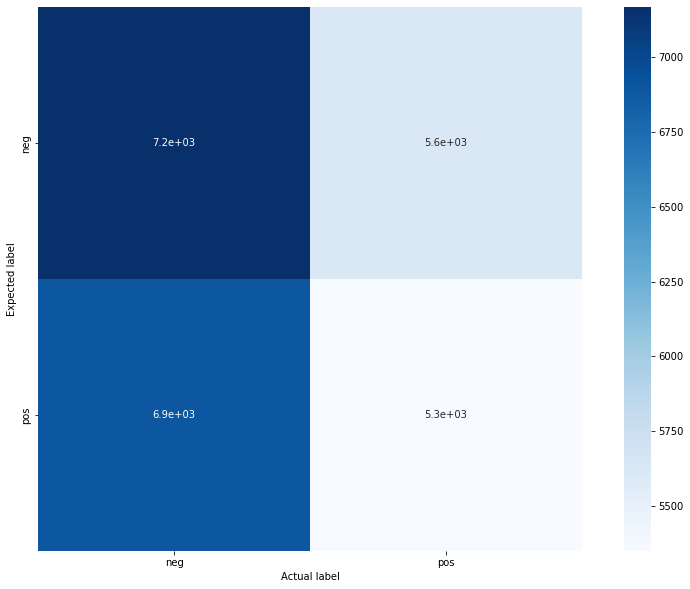

In [359]:
cm=confusion_matrix(actual,expected)

plt.figure(figsize=[15, 10])
sns.heatmap(data=cm, annot=True, cmap='Blues', square=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Actual label')
plt.ylabel('Expected label')
plt.show()

In [360]:
print( classification_report(actual,expected))


              precision    recall  f1-score   support

         neg       0.51      0.56      0.53     12784
         pos       0.49      0.44      0.46     12240

    accuracy                           0.50     25024
   macro avg       0.50      0.50      0.50     25024
weighted avg       0.50      0.50      0.50     25024



In [361]:
failings = df[df['predicted']!= df['actual']]
corrects = df[df['predicted']== df['actual']]

display(failings.head())


failing_predictions = len(failings)

print('n° of failing predictions:',failing_predictions)
# print(failings.index[0])
total_data = len(df)

print('accuracy:',1 - failing_predictions / total_data)

,text,actual,predicted
1,"b""This is a well-crafted piece from everyone's favorite master of suspense. As usual, the technical elements such as camera work and lighting are outstanding (especially for the film's time). I did not find the first part of the film very exciting, but the latter one certainly made up for it with one thrilling scene after another.<br /><br />The only thing I did not like about this movie was the choice of Farley Granger for the part of Guy Haines. Somehow, I didn't find him very believable. On the other hand, Robert Walker shines as sinister 'bad guy' Bruno Anthony.<br /><br />Overall, I would highly recommend this.""",pos,neg
2,"b'an excellent, thoughtfully produced historical drama--well played, artfully written, shot in ways that convey accurate visual images of the congo, and with more than a few moving moments, especially for those who care about the history of Africa and imperialism. however, a fair amount of worthwhile content gets lost in translation, and because names, acronyms, and so forth are hard to follow. so i would strongly recommend checking a neutral source such as wikipedia to get a basic sense of the story being depicted (and the subsequent history) before enjoying the film. if you have the DVD version, there is also some useful historical background. there is a point towards the end of the film where the name of a character who then speaks with an American accent is actually beeped out--a simple google search of ""lumumba film censor"" or something similar will reveal a truly fascinating (and perhaps disturbing) twist regarding the production of this important film. this film, if coupled with a little outside research, helps contextualize dozens of other films relating to central/east Africa and/or imperialism, e.g. hotel rwanda, shake hands with the devil, various adaptations of conrad\'s heart of darkness, and even ""ali"" when mohammed ali visits kinshasa.'",pos,neg
4,"b'How pointless, hideous characters and boring film. Saved by brief sex scenes, mad witch, gorgeous desert island and Brooks body. The plot is tenuous, the characters are shallow and unlikeable. Having said that I did manage to watch it all, mainly because I was totally transfixed by the jiggling and kind of hoping that her character would come good in the end. The film was well shot, well directed but perhaps the casting let it down in some ways. Disappointing. Really summed the review up in the first line but this website dictates that you need to write 10 lines minimum. It would be better to spend the time watching another film.'",neg,pos
7,"b'Truly appalling waste of space. Me and my friend tried to watch this film to its conclusion but had to switch it off about 30 minutes from the end. And i can count the films I have switched off before the end on one hand.<br /><br />The script and direction are leaden and deeply uninspiring. I wouldn\'t be surprised if they found the script in a pile of cast off scripts from 1983. For example the irritating scroat threatening the real estate guy from his house phone. I mean seriously. The police would be beating his door down in minutes. The scenes and events just wash by you like turds in a river. It is difficult to understand the actual thrust of the film. The narrative flicks between characters in a seemingly random manner breaking up the pathetic attempts at building the characters. Oh and what ""characters"" they are. The protagonist played by Rourke is dreadful. He could have just sent a cardboard cut out of himself and stayed in bed. After 60 or so minutes of the film I had built absolutely zero attachment to this character. He is neither sympathetic nor hateful. Just a disfigured dummy from a shop window blundering through every single scene. His motivation is impossible to discern from his generally mumbled and emotionless delivery. Is he happy? Is he sad? Angry? No idea. Just those same dead eyes staring out at you from a disfigured chunk of flesh. And the nat

n° of failing predictions: 12507
accuracy: 0.5001998081841432


* ~~max col width for pandas~~
* ~~word embendings layers with supervized corpus with word2vec~~
* rying ~~trecurrent cnn~~ and ~~bidirectional cnn~~
